# Лабораторна робота 3

**Тема:** Регресійний аналіз

Встановлення
білбліотек:

In [ ]:
import sklearn.metrics
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install sklearn
! pip install seaborn

### Ознайомлення з даними

In [68]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


titanic = pd.read_csv('titanic/train.csv')

print(titanic.head(10))
print(titanic.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

### Обробка даних

In [69]:
#filling in unknown age
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())
#adding family size variable
titanic = titanic.assign(FamilySize=titanic["SibSp"]+titanic["Parch"])
#filling in unknown embarked value
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])
#filling in unknown cabins
titanic["Cabin"] = titanic["Cabin"].fillna("N")
#cropping cabins to the first letter
titanic['Cabin'] = titanic['Cabin'].str[:1]

titanic = pd.get_dummies(titanic, columns = ['Sex','Embarked',"Cabin"])


#dropping irrelevant data
titanic = titanic.drop(["PassengerId", "Name", "Ticket"], axis="columns")

titanic.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Embarked_C,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T
0,0,3,22.000000,1,0,7.2500,1,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,1,1,38.000000,1,0,71.2833,1,True,False,True,...,False,False,False,True,False,False,False,False,False,False
2,1,3,26.000000,0,0,7.9250,0,True,False,False,...,True,False,False,False,False,False,False,False,True,False
3,1,1,35.000000,1,0,53.1000,1,True,False,False,...,True,False,False,True,False,False,False,False,False,False
4,0,3,35.000000,0,0,8.0500,0,False,True,False,...,True,False,False,False,False,False,False,False,True,False
5,0,3,29.699118,0,0,8.4583,0,False,True,False,...,False,False,False,False,False,False,False,False,True,False
6,0,1,54.000000,0,0,51.8625,0,False,True,False,...,True,False,False,False,False,True,False,False,False,False
7,0,3,2.000000,3,1,21.0750,4,False,True,False,...,True,False,False,False,False,False,False,False,True,False
8,1,3,27.000000,0,2,11.1333,2,True,False,False,...,True,False,False,False,False,False,False,False,True,False
9,1,2,14.000000,1,0,30.0708,1,True,False,True,...,False,False,False,False,False,False,False,False,True,False


### Поділ даних на тренувальну та тестову вибірки

In [78]:
from sklearn.model_selection import train_test_split

X = titanic.drop("Survived", axis="columns")
Y = titanic["Survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("Train entries: ", len(X_train))
print("Test entries: ", len(X_test))

Train entries:  712
Test entries:  179


### Побудова моделей

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#DecisionTreeClassifier:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, Y_train)
dt_pred = dt_clf.predict(X_test)

#RandomForest:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, Y_train)
rf_pred = rf_clf.predict(X_test)

#LogisticRegression:
lr_clf = LogisticRegression(max_iter=1500, random_state=42)
lr_clf.fit(X_train, Y_train)
lr_pred = lr_clf.predict(X_test)

#Evaluation
def stats(real_data, pred_data, method_name):
    accuracy = accuracy_score(real_data, pred_data)
    precision = precision_score(real_data, pred_data)
    recall = recall_score(real_data, pred_data)
    f1 = f1_score(real_data, pred_data)

    print(method_name, "stats:\n"+
          f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\n")

stats(Y_test, dt_pred, "Decision Tree")
stats(Y_test, rf_pred, "Random Forest")
stats(Y_test, lr_pred, "Logistic Regression")


Decision Tree stats:
Accuracy: 0.7486033519553073
Precision: 0.7638888888888888
Recall: 0.6626506024096386
F1 Score: 0.7096774193548387

Random Forest stats:
Accuracy: 0.7374301675977654
Precision: 0.7571428571428571
Recall: 0.6385542168674698
F1 Score: 0.6928104575163399

Logistic Regression stats:
Accuracy: 0.8324022346368715
Precision: 0.863013698630137
Recall: 0.7590361445783133
F1 Score: 0.8076923076923077



### Оцінка результатів

Decision Tree
Confusion Matrix:
 [[79 17]
 [28 55]]


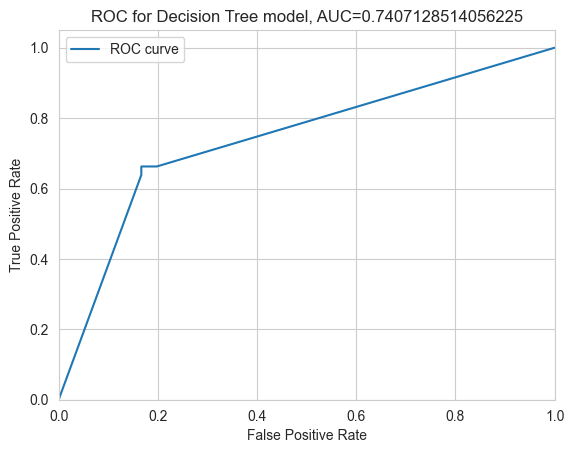

--------------------------------------------------------------------------
Random Forest
Confusion Matrix:
 [[79 17]
 [30 53]]


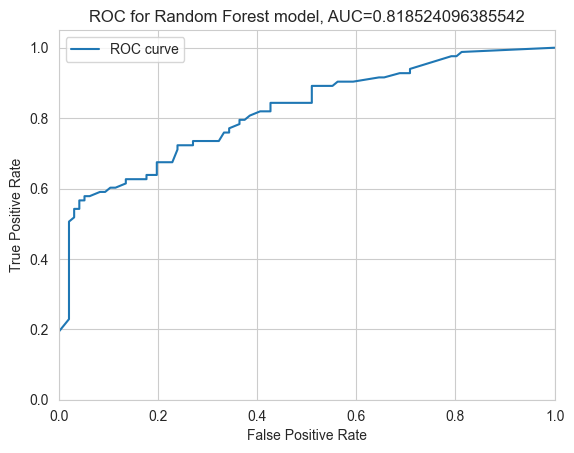

--------------------------------------------------------------------------
Logistic Regression
Confusion Matrix:
 [[86 10]
 [20 63]]


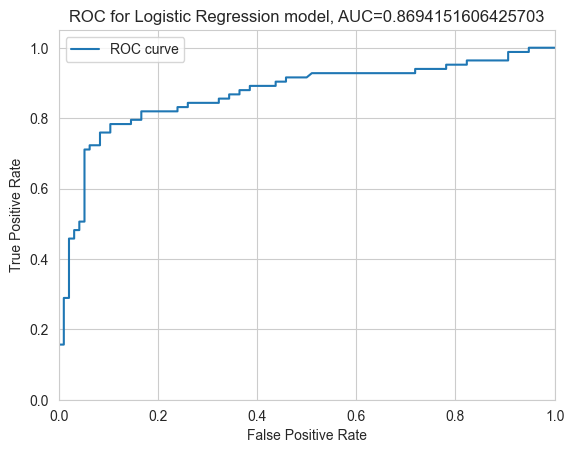

--------------------------------------------------------------------------


In [80]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

def result_grading(real_data, pred_data, pred_prob, method_name):
    #confusion matrix
    confusion_mx = confusion_matrix(real_data, pred_data)
    print(f"{method_name}\nConfusion Matrix:\n", confusion_mx)

    #plotting roc auc
    fpr, tpr, thresholds = roc_curve(real_data, pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(facecolor='white')
    plt.plot(fpr, tpr, label='ROC curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC for {method_name} model, AUC={roc_auc}')
    plt.legend()
    plt.show()
    print("--------------------------------------------------------------------------")

result_grading(Y_test, dt_pred, dt_clf.predict_proba(X_test)[:,1], "Decision Tree")
result_grading(Y_test, rf_pred, rf_clf.predict_proba(X_test)[:,1], "Random Forest")
result_grading(Y_test, lr_pred, lr_clf.predict_proba(X_test)[:,1], "Logistic Regression")



### Оптимізація моделі

In [81]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

#cross validation
k_folds = KFold(n_splits = 5)

scores = cross_val_score(lr_clf, X_train, Y_train, cv = k_folds)

print("Logical regression cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores),"\n--------------")


scores = cross_val_score(dt_clf, X_train, Y_train, cv = k_folds)

print("Decision tree cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores),"\n--------------\n\n")


#GridSearchCV optimisation
param_grid = {'max_depth':[2,5,8,10],
             'min_samples_split':[2,4,6],
             'min_samples_leaf':[1,5,7],
             'n_estimators': list(range(10,100,20))
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(X_train, Y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Logical regression cross Validation Scores:  [0.81818182 0.76923077 0.86619718 0.75352113 0.73239437]
Average CV Score:  0.7879050526937851
Number of CV Scores used in Average:  5 
--------------
Decision tree cross Validation Scores:  [0.8041958  0.77622378 0.87323944 0.79577465 0.77464789]
Average CV Score:  0.8048163104501134
Number of CV Scores used in Average:  5 
--------------


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8553530976066188


### Порівняння моделей

In [82]:
stats(Y_test, dt_pred, "Decision Tree")
stats(Y_test, rf_pred, "Random Forest")
stats(Y_test, lr_pred, "Logistic Regression")

Decision Tree stats:
Accuracy: 0.7486033519553073
Precision: 0.7638888888888888
Recall: 0.6626506024096386
F1 Score: 0.7096774193548387

Random Forest stats:
Accuracy: 0.7374301675977654
Precision: 0.7571428571428571
Recall: 0.6385542168674698
F1 Score: 0.6928104575163399

Logistic Regression stats:
Accuracy: 0.8324022346368715
Precision: 0.863013698630137
Recall: 0.7590361445783133
F1 Score: 0.8076923076923077



Найкраще себе показала модель логістичної регресії

### Завдання з творчим підходом

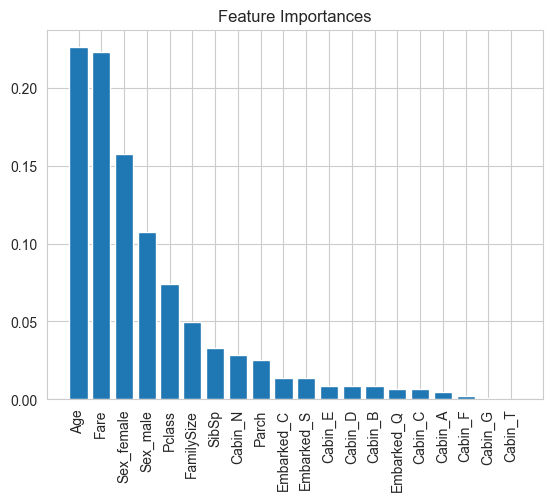

In [83]:
#searching the most valuable variables
importances = rf_clf.feature_importances_

# Sorting features by importance
indices = np.argsort(importances)[::-1]


plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.show()


Більше за все на результати повпливали **вік пасажира** та **ціна квитка**. Для того, щоб модель була більш точною необхідно більше даних, наприклад: вага, ріст, стан здоров'я пасажира.